In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("./co2emissions.csv")
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
unique_check = ["Model","Vehicle Class"]

[print(dataset[i].unique(),":",len(dataset[i].unique()),"\n",'---'*30) for i in unique_check]

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD'] : 2053 
 ------------------------------------------------------------------------------------------
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL'] : 16 
 ------------------------------------------------------------------------------------------


[None, None]

In [5]:
dataset["vehicle_name"] = dataset["Make"] +'_'+ dataset["Model"]
dataset["vehicle_name"] = dataset["vehicle_name"].astype(str)
dataset.vehicle_name = dataset.vehicle_name.str.replace(" ","_")

In [6]:
dataset["vehicle_name"]

0               ACURA_ILX
1               ACURA_ILX
2        ACURA_ILX_HYBRID
3           ACURA_MDX_4WD
4           ACURA_RDX_AWD
              ...        
7380    VOLVO_XC40_T5_AWD
7381    VOLVO_XC60_T5_AWD
7382    VOLVO_XC60_T6_AWD
7383    VOLVO_XC90_T5_AWD
7384    VOLVO_XC90_T6_AWD
Name: vehicle_name, Length: 7385, dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  vehicl

In [8]:
dataset['vehicle_name'] = dataset['vehicle_name'].astype(str)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  vehicl

In [10]:
df = dataset.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),vehicle_name
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,ACURA_ILX
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,ACURA_ILX
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,ACURA_ILX_HYBRID
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,ACURA_MDX_4WD
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,ACURA_RDX_AWD


In [11]:
# df = df.drop(['make','model'],axis=1)

df.head()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()


df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size(l)', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)',
       'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)',
       'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)', 'vehicle_name'],
      dtype='object')

In [12]:
features = ['vehicle_name', 'engine_size(l)', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)']

df = df[features]

In [13]:
df.head()

,vehicle_name,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,ACURA_ILX,2.0,4,AS5,Z,33,196
1,ACURA_ILX,2.4,4,M6,Z,29,221
2,ACURA_ILX_HYBRID,1.5,4,AV7,Z,48,136
3,ACURA_MDX_4WD,3.5,6,AS6,Z,25,255
4,ACURA_RDX_AWD,3.5,6,AS6,Z,27,244


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle_name                 7385 non-null   object 
 1   engine_size(l)               7385 non-null   float64
 2   cylinders                    7385 non-null   int64  
 3   transmission                 7385 non-null   object 
 4   fuel_type                    7385 non-null   object 
 5   fuel_consumption_comb_(mpg)  7385 non-null   int64  
 6   co2_emissions(g/km)          7385 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 404.0+ KB


In [15]:
df = df.drop('transmission', axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle_name                 7385 non-null   object 
 1   engine_size(l)               7385 non-null   float64
 2   cylinders                    7385 non-null   int64  
 3   fuel_type                    7385 non-null   object 
 4   fuel_consumption_comb_(mpg)  7385 non-null   int64  
 5   co2_emissions(g/km)          7385 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 346.3+ KB


In [17]:
df.to_csv('cleaned_co2emission.csv')

In [18]:
df

,vehicle_name,engine_size(l),cylinders,fuel_type,fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,ACURA_ILX,2.0,4,Z,33,196
1,ACURA_ILX,2.4,4,Z,29,221
2,ACURA_ILX_HYBRID,1.5,4,Z,48,136
3,ACURA_MDX_4WD,3.5,6,Z,25,255
4,ACURA_RDX_AWD,3.5,6,Z,27,244
...,...,...,...,...,...,...
7380,VOLVO_XC40_T5_AWD,2.0,4,Z,30,219
7381,VOLVO_XC60_T5_AWD,2.0,4,Z,29,232
7382,VOLVO_XC60_T6_AWD,2.0,4,Z,27,240
7383,VOLVO_XC90_T5_AWD,2.0,4,Z,29,232


## co2 emissions eda

<Axes: >

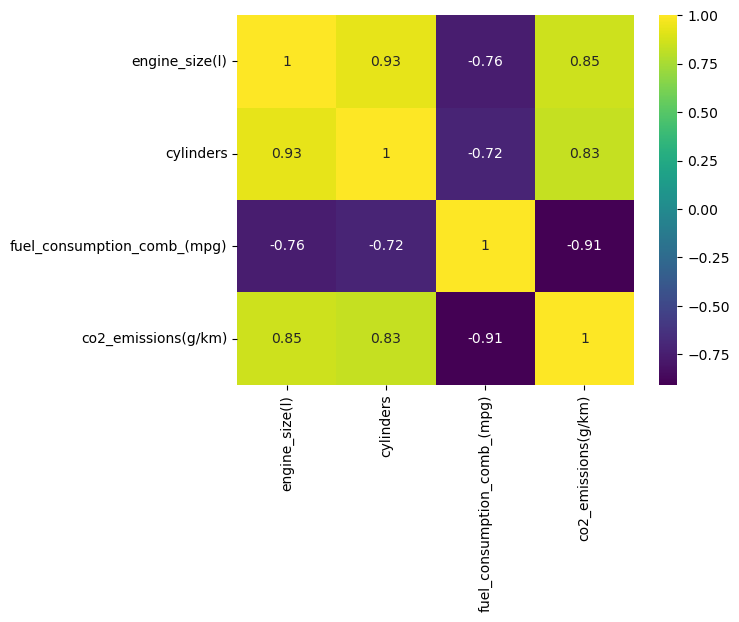

In [19]:
# scatter Plot
corr_df = ["engine_size(l)","cylinders","fuel_consumption_comb_(mpg)","co2_emissions(g/km)"]
sns.heatmap(df[corr_df].corr(), annot=True, cmap='viridis')

In [20]:
X = df[["fuel_consumption_comb_(mpg)"]]
y=df["co2_emissions(g/km)"]

In [21]:
np.array(X).shape

(7385, 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

X_train.shape

(5538, 1)

In [23]:
# scale the x train and y train

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
# y_train_scale = scaler.transform(y_train)


In [24]:
X_train_scale

array([[-0.06081593],
       [-1.31130586],
       [ 1.05073067],
       ...,
       [-0.06081593],
       [ 0.77284402],
       [-0.47764591]])

In [25]:
X_test_scale = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()

reg.fit(X_train_scale,y_train)

LinearRegression()

In [27]:
reg.predict(X_test_scale)

array([261.56382129, 313.21053015, 305.83242889, ..., 276.32002382,
       276.32002382, 187.78280862])

In [30]:
test = 92

test_scaled = scaler.transform([[test]])

reg.predict(test_scaled)

C:\Users\Gobinath\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-225.39086232])

In [28]:
import pickle

pickle.dump(reg,open('linear_regression.pkl','wb'))
pickle.dump(scaler,open('scaler2.pkl','wb'))